In [108]:
import pandas as pd
import os
from pathlib import Path
df = pd.read_csv("../tos_data/tos_data.csv", error_bad_lines=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21278 entries, 0 to 21277
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Length     21278 non-null  int64 
 1   Link       21278 non-null  object
 2   Original   21278 non-null  object
 3   Processed  21278 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.1+ KB


In [109]:
def remove_multiple_space(sentence):
    clear_sentence = ' '.join(sentence.split())
    clear_sentence = clear_sentence.lower()
    return clear_sentence

df['Original'] = df['Original'].apply(remove_multiple_space)
df['Processed'] = df['Processed'].apply(remove_multiple_space)
df

,Length,Link,Original,Processed
0,107,https://policies.google.com/terms?hl=en-US,". as a result, these terms of service help def...",result term service help define google relatio...
1,94,https://policies.google.com/terms?hl=en-US,", which describes the intellectual property ri...",describe intellectual property right content f...
2,53,https://policies.google.com/terms?hl=en-US,", which describes other legal rights you have,...",describe legal right expect case someone viola...
3,48,https://policies.google.com/terms?hl=en-US,understanding these terms is important because...,understand term important use service agree term
4,51,https://policies.google.com/terms?hl=en-US,". although it’s not part of these terms, we en...",although part term encourage read better under...
...,...,...,...,...
21273,73,https://nuacom.ie/terms-conditions/,19.1. headings are included in this gtc for co...,head include gtc convenience shall affect cons...
21274,400,https://nuacom.ie/terms-conditions/,20.1. these gtc together with any documents ex...,gtc together document expressly refer contain ...
21275,85,https://nuacom.ie/terms-conditions/,21.1. if any part of these gtc shall be found ...,part gtc shall find unlawful shall affect vali...
21276,100,https://nuacom.ie/terms-conditions/,21.2. this contract is and shall have deemed t...,contract shall deem make republic ireland shal...


In [110]:
df_sorted = df.copy()
df_sorted.describe(include=[object])
# unique: the number of unique sentences.
# top: the most common value.
# freq: the most common value's frequency.

,Link,Original,Processed
count,21278,21278,21278
unique,264,19914,19570
top,https://asana.com/terms,these support terms describe the packages of s...,statement good faith belief use material manne...
freq,857,10,15


In [111]:
df_sorted.describe(exclude=[object])

,Length
count,21278.000000
mean,268.914842
std,233.613154
min,32.000000
25%,116.000000
50%,194.000000
75%,340.000000
max,3971.000000


In [112]:
df_sorted = df_sorted.drop(columns=['Length', 'Processed'])

In [113]:
import re
def split_sentence(s):
    t_list = re.split('[;.]', s)

    return t_list

def filter_roman_number(s):
    result = []
    for t in s:
        t_result = re.split(r'\(.\) | \(..\) | \(...\) | \(....\)', t)
        result = result + t_result
        
    result = list(filter(None, result))  
    return result

def make_new_row(plist, df_sorted_result):
    for s in plist:
        new_row = {
            'Link': row['Link'],
            'Original': s,
        }
        df_sorted_result = df_sorted_result.append(new_row, ignore_index=True)
    return df_sorted_result

df_sorted_result = pd.DataFrame(columns=['Link', 'Original'])
for i, row in df_sorted.iterrows():
    t_list = split_sentence(row['Original'])
    f_list = filter_roman_number(t_list)
    #f_list = []

    if not f_list:
        df_sorted_result = make_new_row(t_list, df_sorted_result)
    else:
        df_sorted_result = make_new_row(f_list, df_sorted_result)



In [114]:
df_sorted_result = df_sorted_result[df_sorted_result['Original'] != '']
df_sorted_result['Length'] = 0 # Create new 'Length' column.
df_sorted_result['Length'] = df_sorted_result['Original'].apply(lambda x: len(x))
df_sorted_result = df_sorted_result[['Length', 'Link', 'Original']]
df_sorted_result = df_sorted_result.sort_values(by='Length', ascending=False) # data sorted by descending order.
df_sorted_result['Original'] = df_sorted_result['Original'].astype(str)
df_sorted_result = df_sorted_result.drop_duplicates(['Original']) # Remove duplicate data. Remain unique data in column.
df_sorted_result

,Length,Link,Original
47284,1511,https://www.eci.us/about-us/terms-and-conditions/,"seller shall release, protect, defend, indemn..."
41539,1285,https://sicklecellanemianews.com/terms-service/,you are liable for any injury or damages cause...
27625,1242,https://use.expensify.com/terms,except for the indemnity obligations set fort...
55907,1196,https://www.tiaa.org/public/support/terms-cond...,"cellular, virgin mobile, acs wireless, appala..."
57528,1135,https://www.hologic.com/terms-conditions,", fluoroscan, frax (not owned by holx), fusion..."
...,...,...,...
57663,1,https://info.centurymartialarts.com/terms-cond...,n
12450,1,https://www.ui.com/legal/termsofservice/,-
31647,1,https://segment.com/legal/terms/,/
43741,1,https://flo.health/terms-of-service,а


In [115]:
df_sorted = df_sorted[df_sorted['Original'] != '']
df_sorted['Original'] = df_sorted['Original'].astype(str)
df_sorted = df_sorted.drop_duplicates(['Original'])
df_sorted.describe(include=object)

,Link,Original
count,19914,19914
unique,263,19914
top,https://www.eltek.com/us/insights/terms-and-co...,communications made through email or github su...
freq,488,1


In [116]:
df_sorted_result.describe(include=object)

,Link,Original
count,54115,54115
unique,264,54115
top,https://asana.com/terms,some jurisdictions do not allow the exclusion ...
freq,1186,1


In [117]:
# Compare data that calculated length of whole sentence each pandas.
# Through this, you can see how much data is lost after parsing.
sum_df_sorted = 0
sum_df_sorted_result = 0

for i, row in df_sorted.iterrows():
    sum_df_sorted = sum_df_sorted + len(row['Original'])

for i, row in df_sorted_result.iterrows():
    sum_df_sorted_result = sum_df_sorted_result + len(row['Original'])

print('Before text parsing {0}, After text parsing {1}'.format(sum_df_sorted, sum_df_sorted_result))


Before text parsing 8274053, After text parsing 7949993


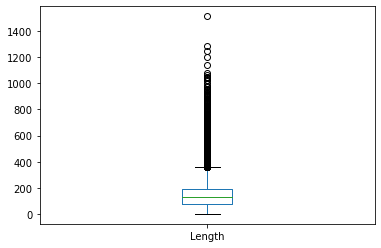

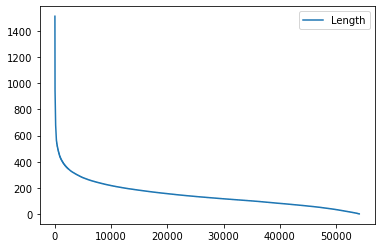

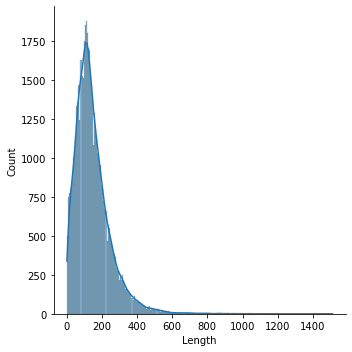

In [118]:
import seaborn as sns
from matplotlib import pyplot as plt
df_sorted_result = df_sorted_result.reset_index(drop=True)
df_sorted_result.plot(kind='box', figsize=(6,4))
df_sorted_result.plot()
sns.displot(df_sorted_result['Length'], kde=True)
# Reference: https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html


In [119]:
df_shuffled = df_sorted_result[df_sorted_result['Length'] > 50]
df_shuffled.describe(exclude=object)

,Length
count,47233.000000
mean,164.215104
std,96.979478
min,51.000000
25%,99.000000
50%,140.000000
75%,203.000000
max,1511.000000


In [120]:
import sklearn

df_shuffled = df_shuffled.drop(columns=['Length'])
df_shuffled = sklearn.utils.shuffle(df_shuffled)
df_shuffled.to_csv(Path(os.getcwd() + "/" + "shuffled_tos_data.csv"), index=False)

In [121]:
# 문장 파싱. (완료)
# 길이 다시 계산 후 길이 열 드랍. (완료)
#문장 랜덤 배치(To remove learning bias.) (완료)